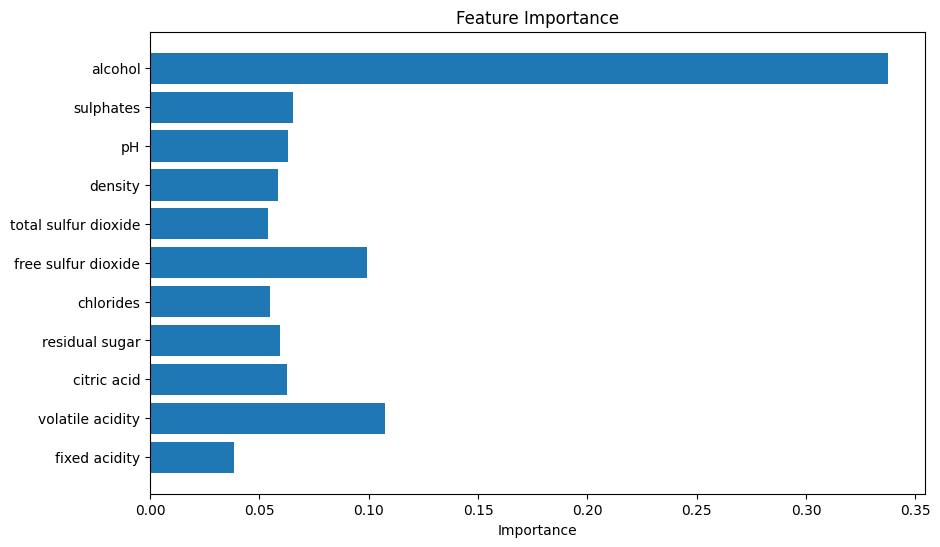

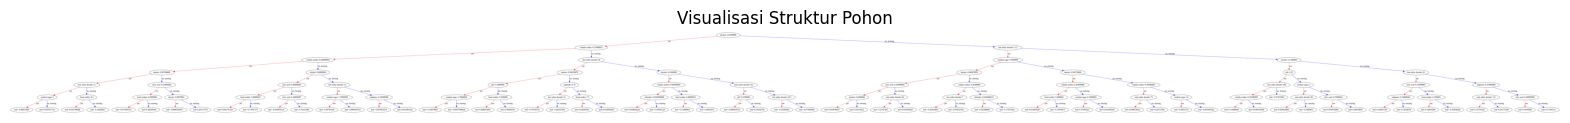

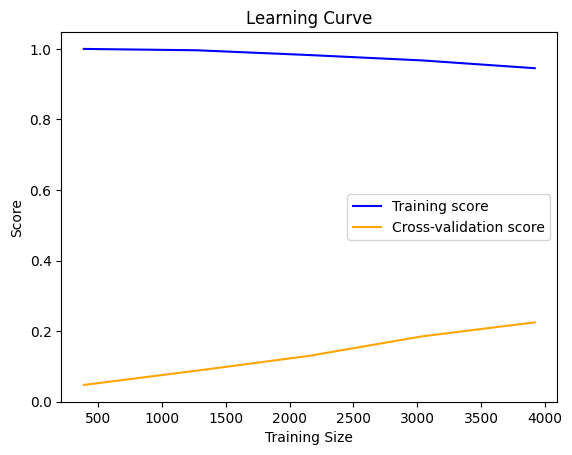

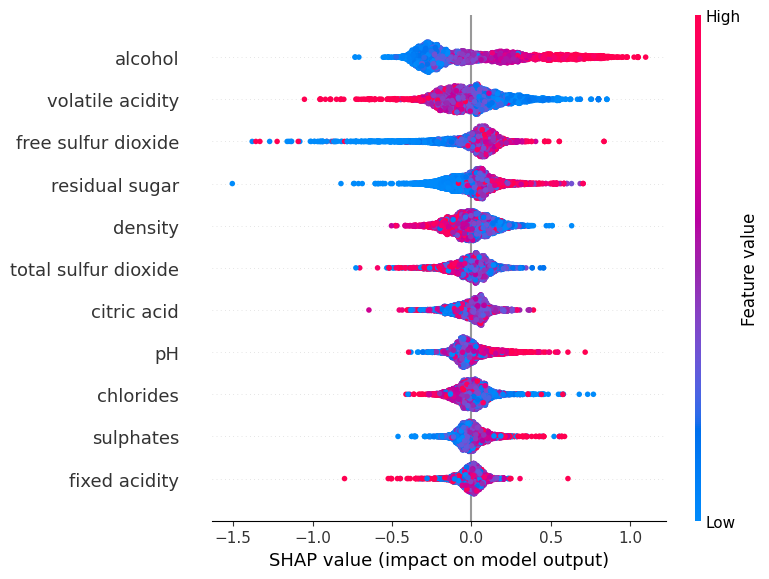

KeyboardInterrupt: 

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
# Import the plot_tree function from xgboost instead of sklearn.tree
from xgboost import plot_tree
# Instead of importing from sklearn.tree you can specify xgboost.plot_tree
# in the function call if you need to avoid overwriting/confusion.
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import mean_squared_error
# Removed the import of plot_tree from sklearn.tree
import shap
from sklearn.inspection import PartialDependenceDisplay, partial_dependence

# 1. Membaca Dataset
data = pd.read_csv('/content/drive/MyDrive/Dataset/tugasxgboost2.csv', sep=';')
X = data.drop('quality', axis=1)
y = data['quality']

# 2. Membagi Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Membangun Model XGBoost
model = XGBRegressor(objective='reg:squarederror', random_state=42)
model.fit(X_train, y_train)

# 4. Visualisasi Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(X.columns, model.feature_importances_)
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

# 5. Visualisasi Struktur Pohon
plt.figure(figsize=(20, 10))
# Use plot_tree from xgboost for visualizing the booster's first tree
plot_tree(model, num_trees=0, ax=plt.gca())  # num_trees=0 refers to the first tree
plt.title('Visualisasi Struktur Pohon')
plt.show()

# 6. Learning Curve
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, label='Training score', color='blue')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score', color='orange')
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()

# 7. SHAP Values
explainer = shap.Explainer(model)
shap_values = explainer(X)

# Visualisasi SHAP Values
shap.summary_plot(shap_values, X)

# 8. Partial Dependence Plot
# Calculate partial dependence
features = [0, 1, 2]  # Ubah fitur sesuai kebutuhan
pdp_results = partial_dependence(model, X, features=features)

# Create the plot using the calculated results and the existing axes object
fig, ax = plt.subplots(figsize=(10, 8))
display = PartialDependenceDisplay.from_estimator(model, X, features, ax=ax,
                                                 line_kw={"color": "red"})
# Now use display.axes_ instead of ax, it holds the created axes objects
plt.title('Partial Dependence Plot')
plt.show()